<a href="https://colab.research.google.com/github/Ftajedini/Github_Tutorial/blob/main/man_woman_detection_deploy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from tensorflow.keras.models import load_model
#برای لود تصاویر
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


دستور انتقال فایل به گوگل درایو




In [5]:
!cp"/content/convnet_transfer_learning_augmentation.h5""/content/drive/MyDrive/"

/bin/bash: line 1: cp/content/convnet_transfer_learning_augmentation.h5/content/drive/MyDrive/: No such file or directory


دستور انتقال فایل از گوگل درایو به کولب

In [ ]:
#!cp "/content/drive/MyDrive/convnet_transfer_learning_augmentation.h5""."

#Load model

In [50]:
model = load_model('convnet_transfer_learning_augmentation.h5')

#Load sample images

In [51]:
#خیلی جاها رنگ مضر است بهتر است سیاه سفید کنیم
image_path = 'images/face_mask_1.jpg'
img1 = image.load_img(image_path,target_size=(180, 180))
img1_arr = image.img_to_array(img1)

In [52]:
img1_arr.shape

(180, 180, 3)

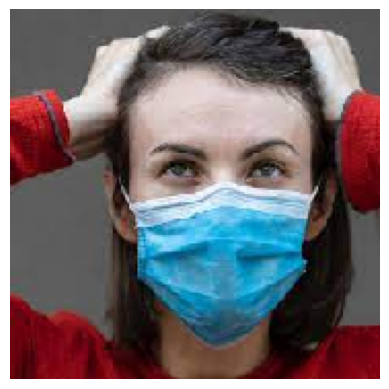

In [53]:
plt.imshow(img1)
plt.axis('off')
plt.show()

In [54]:
#tabdil be 4 boad
img1_arr = img1_arr.reshape(1, 180, 180, 3)
#img1_arr = np.expan_dims(img1_arr, axis=0)
img1_arr.shape

(1, 180, 180, 3)

In [14]:
#type(img1)

PIL.Image.Image

#Test model

In [55]:
pred1= model.predict(img1_arr)

1/1 [==============================] - 1s 507ms/step


In [56]:
print(pred1)

[[0.92631567]]


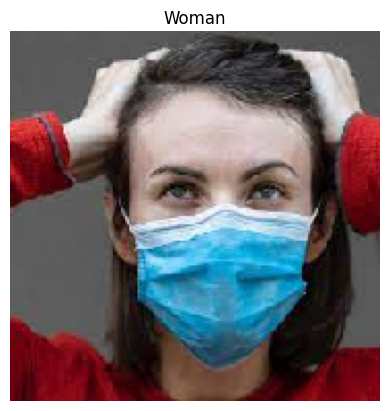

In [57]:
plt.imshow(img1)
plt.axis('off')
plt.title('Man' if pred1<0.5 else 'Woman')
plt.show()